In [1]:
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

from models.transformer import create_vit_model, fit_vit_model
from models.utils.get_train_data import get_average_green_band_data
from models.utils.root_mean_squared_error import root_mean_squared_error
import os.path as osp
import csv
import data
import matplotlib.pyplot as plt

In [38]:
with open(osp.join(osp.dirname(data.__file__), 'patch_names'), newline='') as f:
    reader = csv.reader(f)
    patch_name_data = list(reader)
patch_names = patch_name_data[0]
patch_names = patch_names[0:100]

band = 10

train_data_path = osp.join(osp.dirname(data.__file__), "forest-biomass")

In [39]:
from models.utils.get_train_data import get_all_from_band
# patch_names = patch_names[0:100]
x = get_all_from_band(patch_names, band, train_data_path)

In [40]:
x.shape

(967, 256, 256)

In [41]:
np.std(x)

59.55472530786826

In [42]:
np.mean(x)

26.117708365944328

In [43]:
x[0]

array([[4, 5, 4, ..., 5, 6, 5],
       [5, 5, 4, ..., 5, 6, 5],
       [5, 5, 4, ..., 6, 5, 5],
       ...,
       [4, 4, 3, ..., 7, 6, 6],
       [4, 4, 4, ..., 7, 7, 7],
       [5, 4, 5, ..., 8, 7, 7]], dtype=uint16)

In [44]:
def plot_patch_data(patch_data):
    plt.imshow(patch_data)
    plt.colorbar()
    plt.show()

# for i in range(100):
#     plot_patch_data(x[i])

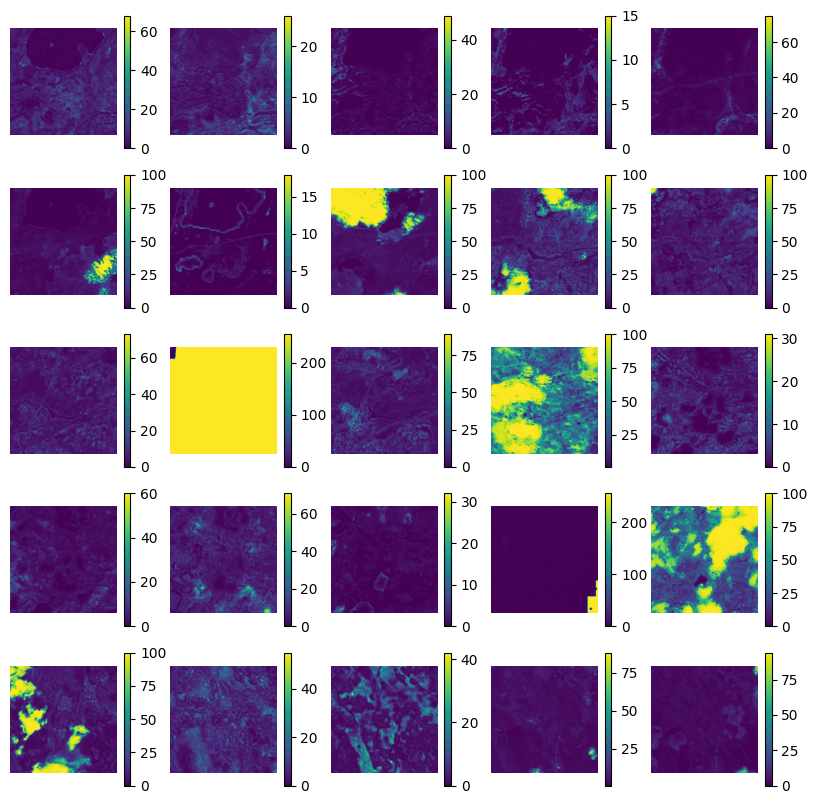

In [45]:
columns = 5
rows = 5
fig = plt.figure(figsize=(10, 10))
for i in range(1, columns * rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x[i])
    plt.colorbar()
    plt.axis("off")
plt.show()